# Graphviz and Python
*Nodes and Edges and Graphs Oh My*

Not this kind of graph ...

![Image](notThatKindOfGraph.svg)

This kind of graph ...

![Image](example1.svg)

graphviz is package of command line programs that allow diagrams to be specified in code and then saved in a number of different formats (.svg, .png, .jpeg, and many more.)

A typical graphviz command:

`dot -Tsvg example1.dot > example1.svg`

Note: `dot` is one of a number of programs that Graphviz refers to as filters.  Filters use different strategies for positioning elements of the graphs.  DOT is also the language used to define graphs.

So what's in a .dot file?
    
```dot
digraph example1{  // directed graph
    rankdir="LR";  // set attribute of graph
    A -> B -> C;   // 3 nodes and the edges between
}
```

![example1](example1.svg)


```dot
graph example2 {
  rankdir="LR";
  label="example2";

  // define a node w/ attributes
  "node 1" [fillcolor="lightgreen"; style="filled"];

  // define another node w/ attributes
  B [label="node 2"];

  /* un-directed edge with attributes */
  "node 1" -- B [label="directionality\nis overrated"];
}
```

![example2](example2.svg)

```dot
digraph example3{
  rankdir="LR";
  label="example3";
  subgraph rectangular_nodes {
    node [shape="rectangle"];
    A;
  };
  subgraph cluster_1{
    label="cluster 1";
    B;
  }
  A -> B;
}
```

![example3](example3.svg)

So what about ...

![python logo](python-logo-generic.svg)

Let's use a Python library to generate the DOT code.

![stack1](stack1.svg)

To install the graphviz library.  

`pip install graphviz`

Make sure the `dot` program is on your `PATH`

In [1]:
from graphviz import Digraph

graph = Digraph('graphviz1', comment='Graph Label')
graph.node('A', "Node1")
graph.node('B', "Node2")
graph.node('C', "Node3")
graph.node('D', 'Node4')
graph.edges(['AB', 'BC'])
graph.edge('C', 'D')

In [2]:
print(graph.source)

// Graph Label
digraph graphviz1 {
	A [label=Node1]
	B [label=Node2]
	C [label=Node3]
	D [label=Node4]
	A -> B
	B -> C
	C -> D
}



In [3]:
# Outputs graph to current directory.  2 Files are created
# a .gv file with the DOT definition of the graph
# a .gv.pdf with the PDF version (pdf generated by default)
# Filename will be based on the name passed to the init method
graph.render()

'graphviz1.gv.pdf'

In [4]:
# specify directory to write file to using directory argument
graph.render(directory='output')

'output/graphviz1.gv.pdf'

In [5]:
# A different output format can be specified when graph is created
graph2 = Digraph('graphviz2', format='svg')

# or at any point
graph.format = 'svg'
graph.directory = '.'
graph.render()

'graphviz1.gv.svg'

![graphviz1](graphviz1.gv.svg)

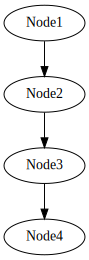

In [6]:
# Hey look graphs automatically display in Jupyter
# (when using svg format)
graph

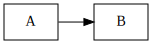

In [7]:
graph3 = Digraph(
    'graphviz3',
    format='svg',
    node_attr={'shape': 'rectangle'},
    graph_attr={'rankdir': 'LR'}
)
graph3.node('A')
graph3.node('B')
graph3.edge('A', 'B')
graph3

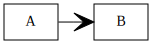

In [8]:
# You can change node, graph, and edge attributes as you build the graph
graph3.edge_attr.update(arrowhead='vee', arrowsize='2')
graph3

In [9]:
print(graph3.source)

digraph graphviz3 {
	graph [rankdir=LR]
	node [shape=rectangle]
	edge [arrowhead=vee arrowsize=2]
	A
	B
	A -> B
}



In [10]:
graph4 = Digraph('graphviz4', format='svg')
graph4.attr('node', shape='oval')
print(graph4.source)

graph5 = Digraph('graphviz5', format='svg')
graph5.attr(rankdir='LR')
print(f"\n{graph5}")

digraph graphviz4 {
	node [shape=oval]
}


digraph graphviz5 {
	rankdir=LR
}



In [11]:
def build_digraph(num, graph_attr=None):
    default_graph_attr = {'rankdir': 'LR'}
    if graph_attr:
        default_graph_attr.update(graph_attr)
    return Digraph(
        f'graphviz{num}',
        format='svg',
        graph_attr=default_graph_attr,
    )

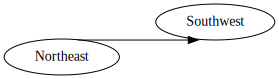

In [12]:
graph6 = build_digraph(6, graph_attr={'splines': 'false'})
graph6.edge('Northeast:ne', 'Southwest:sw')
graph6

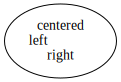

In [13]:
graph8 = build_digraph(8)
graph8.node('A', 'centered\nleft\lright\r')
graph8

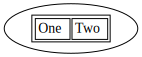

In [14]:
graph9 = build_digraph(9)
graph9.node('B', '<<table><tr><td>One</td><td>Two</td></tr></table>>')
graph9

![valid html](valid_html_venn.svg)

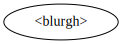

In [15]:
from graphviz import nohtml
graph10 = build_digraph(10)
graph10.node('diamond', label=nohtml('<blurgh>'))
graph10

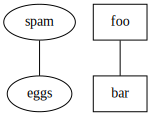

In [16]:
from graphviz import Graph

# Example from graphviz (Python library) User Guide
graph11 = Graph(name='parent')
graph11.edge('spam', 'eggs')

subgraph_a = Graph(name='child', node_attr={'shape': 'box'})
subgraph_a.edge('foo', 'bar')

graph11.subgraph(subgraph_a)
graph11

In [17]:
print(graph11.source)

graph parent {
	spam -- eggs
	subgraph child {
		node [shape=box]
		foo -- bar
	}
}



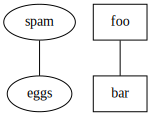

In [18]:
graph12 = Graph('parent')  
graph12.edge('spam', 'eggs')

with graph12.subgraph(
    name='child',
    node_attr={'shape': 'box'}
) as subgraph_a:
    subgraph_a.edge('foo', 'bar')
graph12

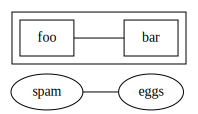

In [19]:
graph13 = Graph(
    'parent', graph_attr={'rankdir': 'LR'},
)
graph13.edge('spam', 'eggs')

with graph13.subgraph(
    name='cluster_child',
    node_attr={'shape': 'box'},
) as subgraph_a:
    subgraph_a.edge('foo', 'bar')
graph13

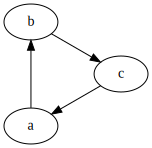

In [20]:
graph14 = Digraph('14', engine="circo")
for pair in "ab,bc,ca".split(','):
    graph14.edge(pair[0], pair[1])
graph
graph14

In [21]:
graph15 = Digraph('15', engine='twopi')
for i in range(1, 7):
    graph15.edge('0', str(i))
    for j in range(1, 3):
        graph15.edge(str(i), f"{i}{j}")

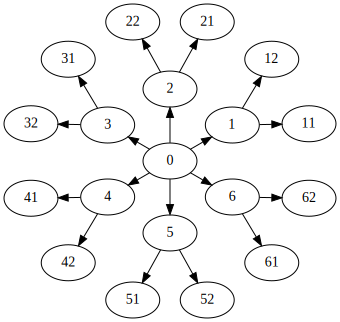

In [22]:
graph15

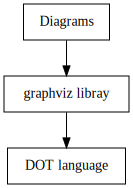

In [23]:
stack2_graph = build_digraph('stack2', {'rankdir': 'TB'})
stack2_graph.attr('node', {'shape': 'rectangle'})
labels = ('Diagrams', 'graphviz libray', 'DOT language')
for i in range(len(labels) - 1):
    stack2_graph.edge(labels[i], labels[i+1])
stack2_graph

To install diagrams library

`pip install diagrams`

In [61]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram(
    "Simple Diagram",  # diagram title
    show=False,  # by default Diagram opens file in viewer
    outformat="svg",
) as diagram:
    EC2("EC2 Thingy") # Create an EC2 node

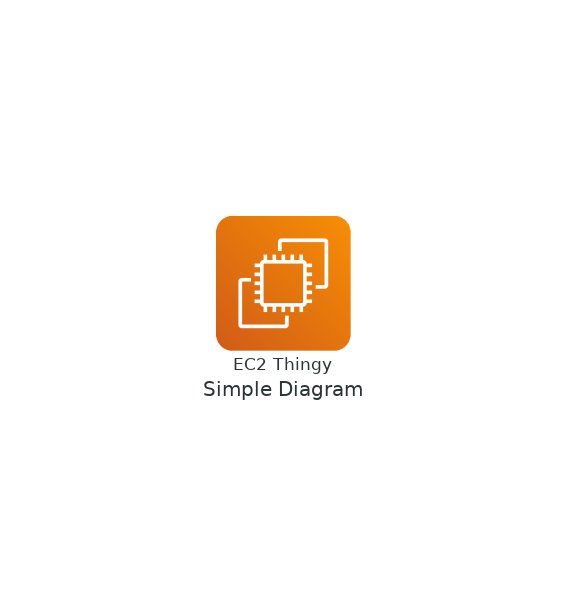

In [62]:
diagram

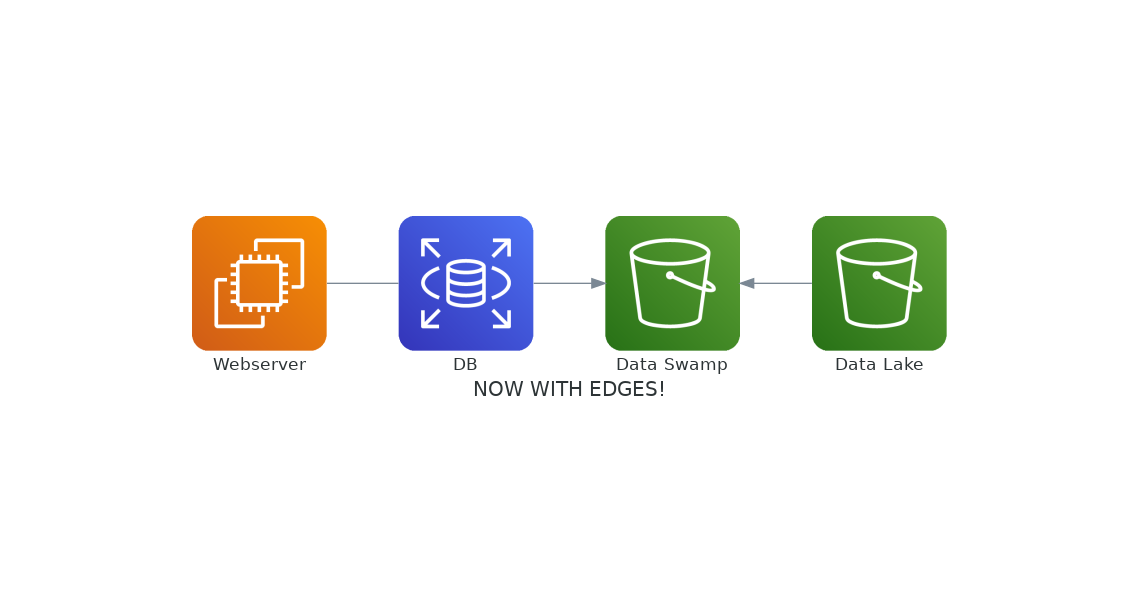

In [25]:
from diagrams.aws.database import RDS
from diagrams.aws.storage import S3

with Diagram("NOW WITH EDGES!", show=False, outformat="svg") as diagram2:
    EC2("Webserver") - RDS("DB") >> S3("Data Swamp") << S3("Data Lake")
diagram2

In [57]:
class DemoDiagram(Diagram):
    def __init__(self, label, **kwargs):
        default_kwargs = {
            'show': False,
            'outformat': 'svg',
            'graph_attr': {
                'pad': '0.125',
                'nodesep': '0.15',
                "ranksep": "0.325",
            },
            'node_attr': {
                "width": "1",
                "height": "1",
            },
        }
        default_kwargs.update(kwargs)
        super().__init__(label, **default_kwargs)

In [63]:
from diagrams.onprem.network import Apache, Tomcat
from diagrams.onprem.database import MySQL
with DemoDiagram("Java Stack", direction="TB") as diagram3:
    web = Apache('webserver')
    app = Tomcat('apserver')
    db = MySQL('database')
    web - app - db

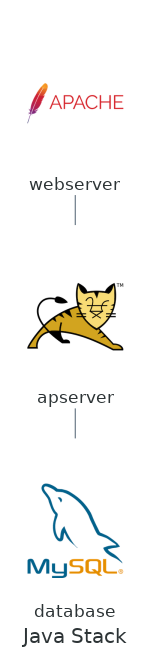

In [64]:
diagram3

## Resources

* [graphviz.org](https://graphviz.org/)
* [graphviz (Python Library)](https://graphviz.readthedocs.io/en/stable/)
* [HTML labels](https://graphviz.org/doc/info/shapes.html#html)
* [Diagrams (Python Library) - documentation](https://diagrams.mingrammer.com/docs/getting-started/installation)
* [Diagrams (Python Library) - Github Repo](https://github.com/mingrammer/diagrams)
